# Analyse de la droiture de la formation de robots

Pour évaluer la droiture d'une formation de ligne de robots, on utilise une approche similaire à celle de la **régression linéaire**. L'idée est de calculer une ligne de régression qui s'ajuste le mieux à la position des robots, puis d'évaluer à quel point chaque robot se trouve proche de cette ligne. la meusure utilisée pour cela est **l'erreur quadratique moyenne (Mean Squared Error, MSE)** entre les positions des robots et la ligne de régression. 

In [1]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from pathlib import Path
from PIL import Image
import datetime


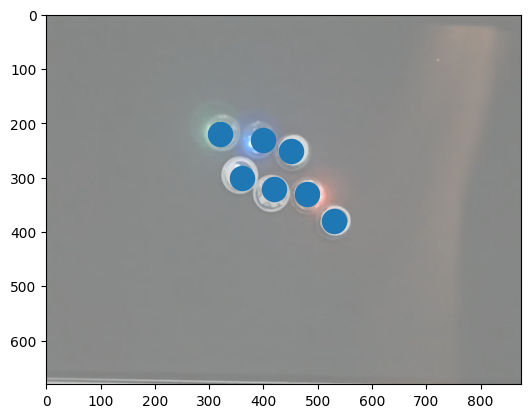

In [2]:
# load data
# robot_position = np.array([[240,290],[290,240],[370,280],[420,320],[440,400],[530,250]])
robot_position = np.array([[320,220],[400,230],[360,300],[420,320],[530,380],[450,250],[480,330]])

picture_path = Path.cwd() / 'pictures'
plot_path = Path.cwd() / 'plots'


img_list = list(picture_path.glob('*.png'))
img = Image.open(img_list[1])
img_array = np.array(img)
plt.imshow(img_array,alpha=0.5)
plt.scatter([x[0] for x in robot_position],[x[1] for x in robot_position],s=300)
arena_size = img_array.shape
plt.show()

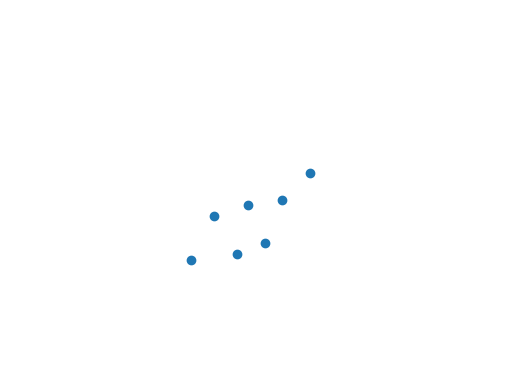

In [3]:
#  fake robot position
# x = np.arange(0, 10)
# y = x + np.random.normal(0, 1, 10)
# robot_position = np.array([x, y])
robot_position = robot_position.T
plt.plot(robot_position[0], robot_position[1], 'o')
plt.xlim(0, arena_size[1])
plt.ylim(0, arena_size[0])
plt.axis('off')
plt.show()

coeficient de régression:  0.6122544434050514
MSE:  1335.8345583322196


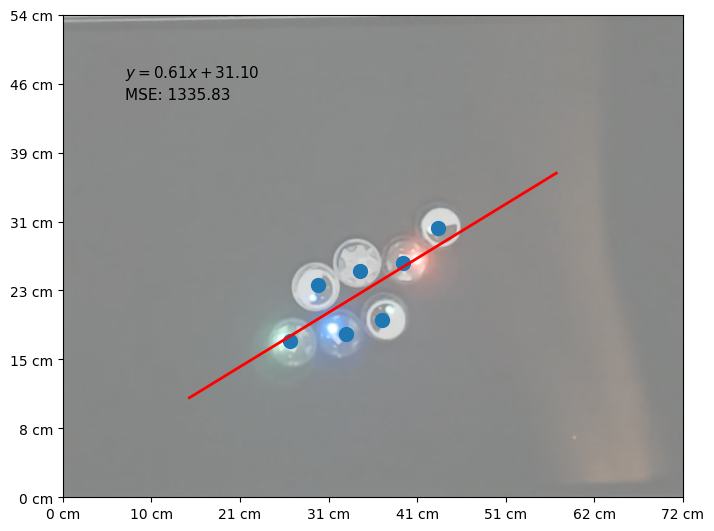

In [4]:
#  regression
reg = linear_model.LinearRegression()
reg.fit(robot_position[0].reshape(-1, 1), robot_position[1].reshape(-1, 1))
print("coeficient de régression: ", *reg.coef_[0])
line = reg.predict(robot_position[0].reshape(-1, 1))
# print(line)
#  MSE
mse = sk.metrics.mean_squared_error(robot_position[1], line)
print("MSE: ", mse)
arena_dim = np.array([54, 72])
# arena_dim = np.array([68, 72])

def custom_ticksx(x, pos):
    #  on fait une interpolation linéaire pour avoir les valeurs en cm
    learp = np.interp(x, [0, arena_size[1]], [0, arena_dim[1]])
    return f"{learp:.0f} cm"

def custom_ticksy(x, pos):
    #  on fait une interpolation linéaire pour avoir les valeurs en cm
    learp = np.interp(x, [0, arena_size[0]], [0, arena_dim[0]])
    return f"{learp:.0f} cm"

fig, ax = plt.subplots(figsize=(8, 10))
ax.imshow(img_array,alpha=0.5)
ax.plot(robot_position[0], robot_position[1], 'o', markersize=10)
ax.plot(np.linspace(0,arena_size[1],50)[10:-10], reg.predict(np.linspace(0,arena_size[1],50)[10:-10].reshape(-1, 1)), color='red', linewidth=2)
ax.set_xlim(0, arena_size[1])
ax.set_ylim(0, arena_size[0])
ax.set_xticks(np.linspace(0, arena_size[1], 8))
ax.set_yticks(np.linspace(0, arena_size[0], 8))
ax.xaxis.set_major_formatter(custom_ticksx)
ax.yaxis.set_major_formatter(custom_ticksy)
ax.text(0.1, 0.9, f"$y = {reg.coef_[0][0]:.2f}x + {reg.intercept_[0]:.2f}$", transform=ax.transAxes, fontsize=11, verticalalignment='top', horizontalalignment='left')
ax.text(0.1, 0.85, f"MSE: {mse:.2f}", transform=ax.transAxes, fontsize=11, verticalalignment='top', horizontalalignment='left')
plt.savefig(plot_path / f'regression{datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")}.png', bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show()

In [5]:
# fake robot direction vector
direction = np.random.rand(10, 2) * 2 - 1
direction = np.random.rand(10, 2) 

# normalize direction vector
norm = np.linalg.norm(direction, axis=1)
direction = direction / norm[:, None]
print("direction: \n", direction)



direction: 
 [[0.78328986 0.62165665]
 [0.68886978 0.72488511]
 [0.71420968 0.69993181]
 [0.79366461 0.60835555]
 [0.99820684 0.05985906]
 [0.99071265 0.13597222]
 [0.75690013 0.65353056]
 [0.81448177 0.58018914]
 [0.25644648 0.96655843]
 [0.85063141 0.5257625 ]]


ValueError: Argument U has a size 10 which does not match 7, the number of arrow positions

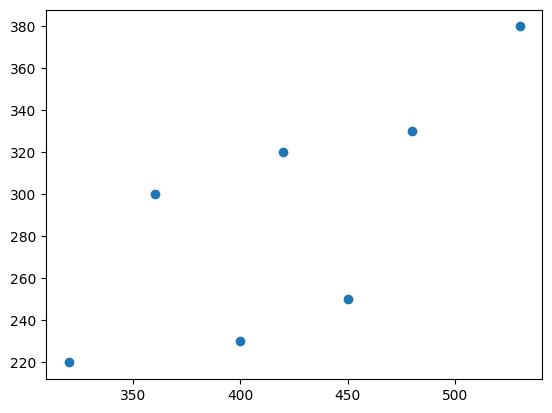

In [6]:
#  plot the direction
plt.plot(robot_position[0], robot_position[1], 'o')
plt.quiver(robot_position[0], robot_position[1], direction[:, 0], direction[:, 1], angles='xy', scale_units='xy', scale=1)
plt.axis('off')
plt.show()

# plot the direction with a polar representation
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.grid(True)
# arrows to plot represent the direction of the robot according to the origin
# convert direction vector to polar coordinates
ax.quiver(np.zeros(10), np.zeros(10), direction[:, 0], direction[:, 1], angles='xy', scale_units='xy', scale=1, alpha=0.5)
ax.set_rmax(1)
ax.set_rmin(0)
ax.set_rticks(np.linspace(0,1,5))  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line


ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()
